DATA CLEANING AND PREPARATION

In [244]:
import pandas as pd

In [245]:
nb = pd.read_csv('/resources/data/nei_bor.csv')

In [246]:
nb.head()

,Neighborhood,Borough
0,BUBUASHIE,Accra
1,DARKUMAN,Accra
2,KISSEMAN,Accra
3,TAIFA,Accra
4,DZORWULU,Accra


In [247]:
nb = nb[~nb[['Neighborhood']].apply(frozenset, axis=1).duplicated()] #remove duplicates

In [248]:
sec1 = pd.read_csv('/resources/data/sec1.csv')

In [249]:
sec1.head(2)

,supid,clusterno,comname,cs1q1,cs1q2,cs1q3a,cs1q3ao,cs1q3b,cs1q3bo,cs1q3c,...,cs1q3do,cs1q4a,cs1q4ao,cs1q4b,cs1q4bo,cs1q4c,cs1q4co,cs1q4d,cs1q4do,cs1q5
0,John Botchway,42,JEWI WHARF,5000.0,50 and above,Akan,NaN,Ewe,NaN,Mole-Dagbani,...,NaN,Charismatic/Pentecostal,NaN,Catholic,NaN,Protestant,NaN,Islam,NaN,More departures
1,John Botchway,2,ELUBO,15420.0,50 and above,Akan,NaN,Other,NIGER,Ewe,...,NaN,Catholic,NaN,Charismatic/Pentecostal,NaN,Protestant,NaN,Other Christians,NaN,More arrivals


In [250]:
#Rename Neighborhood_X
sec1.rename(columns={'cs1q1':'population','cs1q4a':'popular_religion'}, inplace=True)

In [251]:
sec11 = sec1[['population', 'popular_religion','comname']]

In [252]:
#merge data
nb1 = nb.merge(sec11, left_on='Neighborhood', right_on='comname', how = 'inner')

In [253]:
nb1.head(2)

,Neighborhood,Borough,population,popular_religion,comname
0,BUBUASHIE,Accra,70000.0,Charismatic/Pentecostal,BUBUASHIE
1,DARKUMAN,Accra,31000.0,Charismatic/Pentecostal,DARKUMAN


In [254]:
nb1.popular_religion = nb1.popular_religion.astype(str)

In [255]:
nb11 = nb1.copy()

In [256]:
nb11.popular_religion = nb11.popular_religion.astype(str)

In [257]:
nb11 =nb11.groupby('Neighborhood')['popular_religion'].agg([('popular_religion', ', '.join)]).reset_index() #GROUPING DATA BY Neighborhood



In [258]:
len(nb11)

40

In [259]:
nb11

,Neighborhood,popular_religion
0,ABOABO,"Charismatic/Pentecostal, Islam"
1,ABOSSEY OKAI,Charismatic/Pentecostal
2,ABREPO KUMA,Charismatic/Pentecostal
3,ADENTA WEST,Charismatic/Pentecostal
4,AHINSAN,Protestant
5,ALAJO,Protestant
6,AMAKOM,Protestant
7,ASHAIMAN,"Charismatic/Pentecostal, Charismatic/Pentecost..."
8,ASHONGMAN,Protestant
9,AYIGYA,Protestant


In [260]:
nb

,Neighborhood,Borough
0,BUBUASHIE,Accra
1,DARKUMAN,Accra
2,KISSEMAN,Accra
3,TAIFA,Accra
4,DZORWULU,Accra
5,KOKOMLEMLE,Accra
6,ADENTA WEST,Accra
7,OFANKOR,Accra
8,ASHONGMAN,Accra
9,CHORKOR,Accra


In [261]:
#merge data
nb2 = nb11.merge(nb1, left_on='Neighborhood', right_on='Neighborhood', how = 'inner')

In [262]:
nb2.head()

,Neighborhood,popular_religion_x,Borough,population,popular_religion_y,comname
0,ABOABO,"Charismatic/Pentecostal, Islam",Kumasi,500.0,Charismatic/Pentecostal,ABOABO
1,ABOABO,"Charismatic/Pentecostal, Islam",Kumasi,35000.0,Islam,ABOABO
2,ABOSSEY OKAI,Charismatic/Pentecostal,Accra,12000.0,Charismatic/Pentecostal,ABOSSEY OKAI
3,ABREPO KUMA,Charismatic/Pentecostal,Kumasi,20000.0,Charismatic/Pentecostal,ABREPO KUMA
4,ADENTA WEST,Charismatic/Pentecostal,Accra,126000.0,Charismatic/Pentecostal,ADENTA WEST


In [263]:
#remove or drop Neighborhood_y column
nb2 = nb2.drop(columns=['popular_religion_x', 'comname'])


In [264]:
nb2.head(2)

,Neighborhood,Borough,population,popular_religion_y
0,ABOABO,Kumasi,500.0,Charismatic/Pentecostal
1,ABOABO,Kumasi,35000.0,Islam


In [265]:
#Rename Neighborhood_X
nb2.rename(columns={'popular_religion_y':'popular_religion'}, inplace=True)

In [266]:
nb2.head(2)

,Neighborhood,Borough,population,popular_religion
0,ABOABO,Kumasi,500.0,Charismatic/Pentecostal
1,ABOABO,Kumasi,35000.0,Islam


In [267]:
sec2 = pd.read_csv('/resources/data/sec2.csv', sep=',', encoding = 'latin-1')

In [268]:
sec2.head(2)

,supid,clusterno,comname,cs2q1a,cs2q1ao,cs2q1b,cs2q1bo,cs2q1c,cs2q1co,cs2q1d,...,cs2q37,cs2q38,cs2q39a,cs2q39ao,cs2q39b,cs2q39bo,cs2q39c,csq29co,cs2q31both,cs2q36both
0,John Botchway,42,JEWI WHARF,Trading,NaN,Fishing,NaN,Other,BOAT TRANSPORT BUSINESS,NO OTHER,...,NaN,More difficult,Construction/Maintenance of school building,NaN,NO OTHER,NaN,NaN,NaN,NaN,NaN
1,John Botchway,2,ELUBO,Trading,NaN,Fishing,NaN,NO OTHER,NaN,NaN,...,25-29 years,More difficult,Construction of Roads/Bridges,NaN,NO OTHER,NaN,NaN,NaN,NaN,NaN


In [269]:
#Rename columns
sec2.rename(columns={'cs2q1a':'major_economic_act','cs2q6':'occassional_road_impasses','cs2q14':'post_office','cs2q19':'nearest_bank', 
                    'cs2q20':'permanent_daily_mkt'}, inplace=True)

In [270]:
sec22 = sec2[['comname','major_economic_act','occassional_road_impasses','post_office','permanent_daily_mkt']]

In [271]:
sec22.head()

,comname,major_economic_act,occassional_road_impasses,post_office,permanent_daily_mkt
0,JEWI WHARF,Trading,Yes,No,Yes
1,ELUBO,Trading,No,Yes,Yes
2,EFASU,Farming,Yes,No,No
3,MBEM,Trading,No,No,No
4,ELOYN,Fishing,No,No,No


In [272]:
#merge data
#nb1 = nb3
#nb = nb2
nb3 = nb2.merge(sec22, left_on='Neighborhood', right_on='comname', how = 'inner')

In [273]:
nb3.head(2)

,Neighborhood,Borough,population,popular_religion,comname,major_economic_act,occassional_road_impasses,post_office,permanent_daily_mkt
0,ABOABO,Kumasi,500.0,Charismatic/Pentecostal,ABOABO,Farming,Yes,No,No
1,ABOABO,Kumasi,500.0,Charismatic/Pentecostal,ABOABO,Trading,No,Yes,Yes


In [274]:
nb3 = nb3.replace(['Yes'], 1)

In [275]:
nb3 = nb3.replace(['No'], 0)

In [276]:
nb33 = nb3.groupby('Neighborhood').mean().reset_index()

In [277]:
nb33.head(2)

,Neighborhood,population,occassional_road_impasses,post_office,permanent_daily_mkt
0,ABOABO,17750.0,0.5,0.5,0.5
1,ABOSSEY OKAI,12000.0,1.0,1.0,0.0


In [278]:
sec3 = pd.read_csv('/resources/data/sec3_prim.csv', sep=',', encoding = 'latin-1')

In [279]:
sec3.head(2)

,supid,clusterno,comname,pmsc,cs3q5,cs3q6,cs3q7,cs3q8,cs3q9,cs3q10
0,John Botchway,42,JEWI WHARF,1,JEWI WHARF D/C PRIMARY,Public,Mixed,No,NaN,1985
1,John Botchway,42,JEWI WHARF,2,JEWI WHARF SCHOOL,Public,Mixed,No,NaN,1988


In [280]:
sec33 = sec3[['comname','pmsc']]

In [281]:
# Note. there are more participants and that is why we need to take the mean. The mean here is the mean of the answers by the respondents
sec333 = sec33.groupby('comname').mean()

In [282]:
sec333.head(2)

,pmsc
comname,
ABAASA,2.0
ABEPOTIA,1.5


In [283]:
#merge data
#nb1 = nb3
#nb = nb2
nb5 = nb33.merge(sec333, left_on='Neighborhood', right_on='comname', how = 'inner')

In [284]:
nb5.head(2)

,Neighborhood,population,occassional_road_impasses,post_office,permanent_daily_mkt,pmsc
0,ABOABO,17750.0,0.5,0.5,0.5,1.75
1,ABOSSEY OKAI,12000.0,1.0,1.0,0.0,2.00


In [285]:
len(nb5)

40

In [286]:
sec4 = pd.read_csv('/resources/data/sec4.csv', sep=',', encoding = 'latin-1')

In [287]:
sec4.head(2)

,supid,clusterno,comname,jhsc,cs3q15,cs3q16,cs3q17,cs3q18,cs3q19
0,John Botchway,42,JEWI WHARF,1,JEWI WHARF DA JHS,Public,Mixed,3.0,1985
1,John Botchway,42,JEWI WHARF,2,JEWI WHARF ISLAMIC SCHOOL,Public,Mixed,3.0,1988


In [288]:
sec44 = sec4[['comname','jhsc']]

In [289]:
# Note. there are more participants and that is why we need to take the mean. The mean here is the mean of the answers by the respondents
sec444 = sec44.groupby('comname').mean()

In [290]:
sec444.head(2)

,jhsc
comname,
ABAASA,2.0
ABEPOTIA,1.0


In [291]:
#merge data
#nb1 = nb3
#nb = nb2
nb6 = nb5.merge(sec444, left_on='Neighborhood', right_on='comname', how = 'inner')

In [292]:
nb6.head(2)

,Neighborhood,population,occassional_road_impasses,post_office,permanent_daily_mkt,pmsc,jhsc
0,ABOABO,17750.0,0.5,0.5,0.5,1.75,1.75
1,ABOSSEY OKAI,12000.0,1.0,1.0,0.0,2.00,2.00


In [293]:
# pmsc and jhsc seems the same, let's take the average

In [294]:
nb6['pm_jh_mean'] = (nb6.pmsc + nb6.jhsc)/2

In [295]:
nb6.head(2)

,Neighborhood,population,occassional_road_impasses,post_office,permanent_daily_mkt,pmsc,jhsc,pm_jh_mean
0,ABOABO,17750.0,0.5,0.5,0.5,1.75,1.75,1.75
1,ABOSSEY OKAI,12000.0,1.0,1.0,0.0,2.00,2.00,2.00


In [296]:
#remove or drop Neighborhood_y column
nb6 = nb6.drop(columns=['jhsc', 'pmsc'])

In [297]:
nb6.head(2)

,Neighborhood,population,occassional_road_impasses,post_office,permanent_daily_mkt,pm_jh_mean
0,ABOABO,17750.0,0.5,0.5,0.5,1.75
1,ABOSSEY OKAI,12000.0,1.0,1.0,0.0,2.00


In [298]:

nb7 = nb6.merge(nb, left_on='Neighborhood', right_on='Neighborhood', how = 'inner')

In [299]:
nb7.head()

,Neighborhood,population,occassional_road_impasses,post_office,permanent_daily_mkt,pm_jh_mean,Borough
0,ABOABO,17750.0,0.5,0.5,0.5,1.75,Kumasi
1,ABOSSEY OKAI,12000.0,1.0,1.0,0.0,2.00,Accra
2,ABREPO KUMA,20000.0,0.0,0.0,1.0,2.00,Kumasi
3,ADENTA WEST,126000.0,0.0,0.0,0.0,2.00,Accra
4,AHINSAN,25000.0,0.0,1.0,0.0,2.00,Kumasi


In [300]:
nb7.shape

(40, 7)

In [311]:
nb7.Neighborhood = nb7['Neighborhood'].replace(['ADENTA WEST'], 'ADENTA')
nb7.Neighborhood = nb7['Neighborhood'].replace(['ABREPO KUMA'], 'ABREPO')
nb7.Neighborhood = nb7['Neighborhood'].replace(['NEW TAFO (KROFROM)'], 'TAFO')
nb7.Neighborhood = nb7['Neighborhood'].replace(['NEW TAFO (MANHYIA EXTENSION)'], 'MANHYIA')


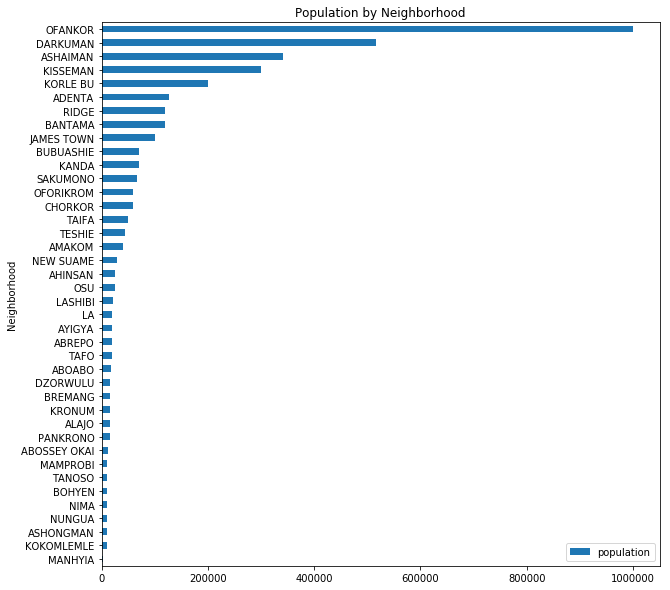

In [312]:
nb7.sort_values('population', ascending=True).plot.barh(x='Neighborhood', y='population', title = 'Population by Neighborhood', rot=0, figsize=(10,10))

In [313]:
nb7.head(2)

,Neighborhood,population,occassional_road_impasses,post_office,permanent_daily_mkt,pm_jh_mean,Borough
0,ABOABO,17750.0,0.5,0.5,0.5,1.75,Kumasi
1,ABOSSEY OKAI,12000.0,1.0,1.0,0.0,2.00,Accra


In [314]:
nb7.Neighborhood = nb7['Neighborhood'].str.capitalize()

In [320]:
nb7.Neighborhood = nb7['Neighborhood'].replace(['New suame'], 'Suame')


In [323]:
nb7.Neighborhood = nb7['Neighborhood'].replace(['Bremang'], 'Breman')

In [324]:
nb7.sort_values('Borough')

,Neighborhood,population,occassional_road_impasses,post_office,permanent_daily_mkt,pm_jh_mean,Borough
19,Kisseman,300000.0,0.0,1.000000,1.000000,3.500000,Accra
37,Taifa,50000.0,1.0,1.000000,1.000000,2.000000,Accra
36,Sakumono,66000.0,0.0,1.000000,1.000000,2.000000,Accra
35,Ridge,120000.0,0.0,0.000000,1.000000,2.500000,Accra
33,Osu,25000.0,0.0,1.000000,1.000000,2.000000,Accra
31,Ofankor,999999.0,0.0,1.000000,1.000000,1.500000,Accra
30,Nungua,10000.0,0.0,1.000000,1.000000,3.000000,Accra
29,Nima,10000.0,0.0,1.000000,1.000000,1.500000,Accra
25,Mamprobi,11000.0,0.0,1.000000,0.000000,2.000000,Accra
24,Lashibi,22000.0,0.0,1.000000,1.000000,2.000000,Accra


In [325]:
nb7.to_csv('/resources/data/nb7.csv')